# World Happiness Report
## By: Mimi Doan and Yixin Ren


### Goals
This project aims to find a suitable model for predicting world happiness index as well as suggesting the 
factor that contributes the most to the happiness score of each country. 

### Summary 
We will be using the existing 2019 World Happiness Report. After fitting and transforming models using the 
method of ordinary least squares, our final linear regression model with variables such as GDP per capita, 
generosity, perceptions of corruption, and more, was used to predict the happiness scores of countries in 2018. 
We found that the model had a successful rate of 70%. We feel that this rate was appropriate considering that 
we were only predicting happiness scores. Our final model also indicates that GDP per capita, the square of 
social support, healthy life expectanct, and freedom to make life choices were the most significant factors at 
the significance level of 95% that will influence the happiness score. We also concluded that the freedom to 
make life choices was the most important variable that will affect the happiness score.

### Introduction to the data
In the following report, we will be using 2019 World Happiness Report's dataset to find a suitable model 
because it contains values that estimate the extent to which each of these variables, GDP per capita, 
social support, healthy life expectancty, freedom to make life choices, generosity, and perceptions of 
corruption, contribute to making life evaluations (happiness score) higher in each country and the score is 
based on how 1000 people in each country scored their happiness level on a range from 1 (least happy) to 10 
(most happy). We believed that this would help accomplish our goal of finding which variable had the greatest 
impact overall based on all countries. For further exploration into the data, please visit our 
[dashboard](https://world-happiness-mimi-yixin.herokuapp.com/).


### Conclusion
Our first model contained the six initial variables that were given in the dataset: GDP per capita, 
social support, healthy life expectancty, freedom to make life choices, generosity, and perceptions of 
corruption. This was the model equation:

$\text{Happiness Score} = 1.7952 + 0.7754(\text{GDP}) + 1.1242(\text{Social Support}) + 1.0781(\text{Healthy life expectancy})$
$ + 1.4548(\text{Freedom to make life choices}) + 0.4898(\text{Generosity}) + 0.9723(\text{log Corruption})$

After transforming social support and perceptions of corruption, we achieved our final model with seven 
explanantory variables to predict world happiness score:

$\text{Happiness Score} = 3.2150 + 0.6943(\text{GDP}) - 1.3010(\text{Social Support}) + 1.2195(\text{sq Social})$ 
$+ 1.0576(\text{Healthy life expectancy}) + 1.5431(\text{Freedom to make life choices}) + 0.3580(\text{Generosity})$ 
$+ 0.770(\text{log Corruption})$

This model predicted the 2018 World Happiness scores at an accuracy rate of 70%. Four of the variables in the 
model (GDP per capita, the square of social support, healthy life expectancy, and freedom to make life choices) 
were significant at $\alpha = 0.05$, meaning there was significant evidence of a relationship between the 
variables and the happiness score. We concluded that the freedom to make life choices had the greatest impact 
on predicting a country's happiness score, holding the other variables constant, as its beta coefficient was 
the largest than the other variables.

To look at more information about this project, visit our [repository](https://github.com/my-doan/happiness).
___

## The Code
### Exploring the data
First, we must import all the functions that will be used in this project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

Now, we will read the 2019 dataset into a variable called `happiness`.

In [2]:
happiness = pd.read_csv('2019.csv')

Let's look at some of the data and what is in each column.

In [3]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


The 2019 World Happiness dataset itself contains nine columns. The variable `Score` stands for the happiness 
score of each country or region. The columns following the happiness score estimate the extent to which each 
of six factors – GDP per capita, social support, healthy life expectancy, freedom, perceptions of corruption, 
and generosity, are valued in their respective country/region. The dataset is already in order of the 
happiness score, from most happy to least happy, hence the first column `Overall Rank`.

### Making the initial model
Before making our model, we must rename the columns by replacing the spaces with underscores so that we can 
run the regression properly as it does not accept variables with spaces in them.

In [4]:
happiness.rename(columns = {'Perceptions of corruption':'Perceptions_of_corruption'}, inplace = True)
happiness.rename(columns = {'GDP per capita':'GDP_per_capita'}, inplace = True)
happiness.rename(columns = {'Social support':'Social_support'}, inplace = True)
happiness.rename(columns = {'Healthy life expectancy':'Healthy_life_expectancy'}, inplace = True)
happiness.rename(columns = {'Freedom to make life choices':'Freedom_to_make_life_choices'}, inplace = True)

Let's see if it worked!

In [5]:
happiness.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

We only changed the columns that we needed which is why `Overall rank` and `Country or region` still have 
spaces. The initial model is a linear regression model with `Score` as our response variable, and the six 
following it as our explanatory variables. We will bring in the `OLS` function from the `statsmodels` package. 
This method is the ordinary least squares regression, which focuses on minimizing the sum of squared residuals 
($observed$ values $- predicted$ values).

In [6]:
model1 = smf.ols('''Score ~ GDP_per_capita + Social_support + Healthy_life_expectancy +  
                Freedom_to_make_life_choices + Generosity + Perceptions_of_corruption''', 
                data=happiness).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           2.40e-46
Time:                        15:20:34   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.7952      0.211      8.505      0.000       1.378       2.212
GDP_per_capita                   0.7754      0.218      3.553      0.001       0.344       1.207
Social_support                   1.1242      0.237      4.745      0.000       0.656       1.592
Healthy_life_expectancy          1.0781      0.335      3.223      0.002       0.417       1.739
Freedom_to_make_life_choices     1.4548      0.375      3.876      0.000       0.713       2.197
Generosity                       0.4898      0.498      0.984      0.327      -0.494       1.473
Perceptions_of_corruption        0.9723      0.542      1.793      0.075      -0.099       2.044
==============================================================================
Omnibus:                        8.188   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.971
Skew:                          -0.498   Prob(JB):                       0.0186
Kurtosis:                       3.483   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Only some of the information given in the summary of the model will be used.</br>
To start off, we must decide whether this model is useful before further exploring. Using the Regression 
F-test, we see that the p-value `Prob (F-statistic)` corresponding with the F-statistic at the top of this 
table is approximately 0. This means there is significant evidence that at least one of the beta coefficients 
(`coef` column) is not equal to 0, and that this model is useful.

According to the adjusted R-squared at the top of the table, approximately 77% of the variation in the scores 
is explained by the 
model, leaving 23% unexplained. 

Now, let's discuss the variables. Looking at the `P>|t|` column which is the variables' corresponding 
p-values, we can see that all are significant at $\alpha = 0.05$ besides `Generosity` and 
`Perceptions_of_corruption`. This means there is no sufficient evidence that there is a relationship between 
generosity and happiness score, and perceptions of corruption and happiness score.

This is the model equation based on the variables' coefficients:

$\text{Happiness Score} = 1.7952 + 0.7754(\text{GDP}) + 1.1242(\text{Social Support}) + 1.0781(\text{Healthy life expectancy})$
$ + 1.4548(\text{Freedom to make life choices}) + 0.4898(\text{Generosity}) + 0.9723(\text{log Corruption})$

### Checking model assumptions
Before deciding that this is the best model to use, we must look further into the residuals to see if it 
satisfies all of the model assumptions for linear regression:
- **Linearity**: are the residuals randomly scattered?
- **Constant variance**: is the variance between the residuals constant going along the x-axis and y-axis?
- **Normal distribution**: are the residuals normally distributed?
- **Independence of design**: do the results of one subject/participant affect another?

We need to plot the residuals so that we will be able to see their shape and distribution. To repeat, 
residuals are $observed-predicted$ where the $observed$ values are in the `Score` column of our dataset and 
the $predicted$ are the scores we got from our model fitting using the variables. 


(array([ 1.,  1.,  3.,  2.,  3.,  7., 19., 17., 20., 25., 26., 16.,  7.,
         7.,  2.]),
 array([-1.75304358, -1.55680142, -1.36055926, -1.16431711, -0.96807495,
        -0.77183279, -0.57559064, -0.37934848, -0.18310632,  0.01313583,
         0.20937799,  0.40562015,  0.6018623 ,  0.79810446,  0.99434662,
         1.19058877]),
 <BarContainer object of 15 artists>)

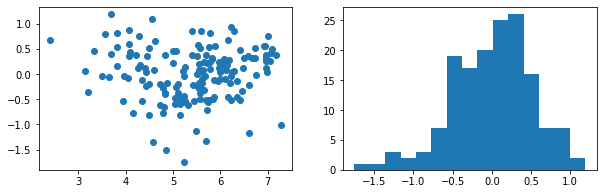

In [7]:
plt.rcParams.update({'figure.figsize':(10, 3)})

pred_val = model1.fittedvalues.copy()
true_val = happiness['Score'].values.copy()
residual = true_val - pred_val

plt.subplot(121)
plt.scatter(pred_val, residual)

plt.subplot(122)
plt.hist(residual, bins = 15)

The plot on the left is the fitted values of `Score` against the residuals of the model. The histogram on the 
right is the distribution of the residuals.

- **Linearity**: The residuals in the scatterplot look fairly random but it appears there may be a slight 
curve. It would be best to further investigate, meaning this assumption is not met.
- **Constant Variability**: As we go along the x-axis or the y-axis, there is constant variance between the 
residuals. There is no obvious cone or fanning out shape. This assumption is met.
- **Normal distribution**: The distribution of the residuals is slightly skewed to the left, but it is not 
obvious enough for it to be a major issue. This assumption is met.
- **Independence of design**: This organization asked 1000 random people in each country which means their 
responses would not have influenced each others'. This assumption is met.

We know that there may be a little curve in the residuals, so we must look further into each variable and if 
there is any skewness or clustering present. First, we make a subset of just the columns we need so that we 
can plot each variable against `Score` easily. We will make a pairplot using the package `seaborn`.

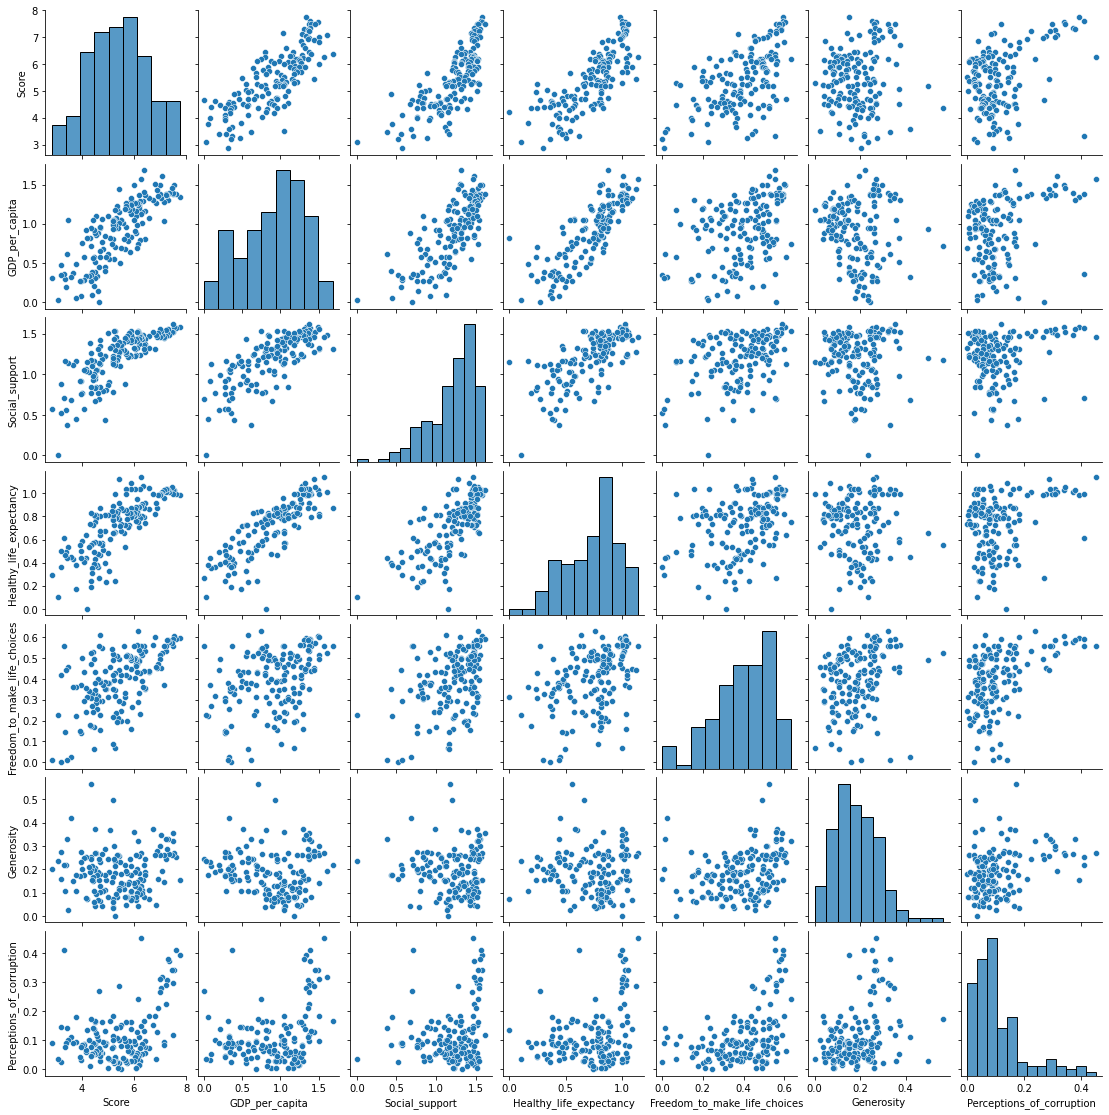

In [8]:
sub_happy = happiness[['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
                       'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption']]
sns.pairplot(sub_happy, height=2.25)

The first row of scatterplots will show each variable against `Score`. In this row, we can see the 
relationships are fairly linear besides `Generosity` and `Perceptions_of_corruption`. These may be variables 
we will need to address.

When the same variable intersects on the pairplot, it shows the histogram of the variable. While some are 
moderately normal, it is evident that the histogram of `Social_support` is left skewed and and that 
`Perceptions_of_corruption` is right skewed.

In order to make a better fitting model, we must transform some of these variables.

### Transformation
We have decided that we are going to transform `Social_support` and `Perceptions_of_corruption` as they seem 
to be extremely skewed. 

For social support, we feel that it may be best to square this term since there might be a slight curve in 
its respective scatterplot. Hence, it may be able to explain the curve in the residuals of the model. For 
perceptions of corruption, it is typical to do a natural log transformation on a variable that is extremely 
skewed to the right, so we will also use this method.

In [9]:
sub_happy = sub_happy.copy()
sub_happy['sq_Social'] = sub_happy['Social_support'] ** 2
sub_happy['log_Corruption'] = np.log(sub_happy['Perceptions_of_corruption'])
sub_happy.head()

/opt/venv/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,sq_Social,log_Corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.518569,-0.933946
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.474329,-0.891598
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.502724,-1.075873
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.637376,-2.137071
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.316484,-1.210662


In order to add new columns, we must create a copy of the dataset first. We should also keep in mind that when 
we add polynomial terms (`sq_Social`), we will not remove the lower-order terms (`Social_support`) before that 
as it is best practice to not do so. After taking the natural log of the values in `Perceptions_of_corruption`, 
there were some values of infinity. So we removed these rows before fitting a new model, as it would raise 
errors.

What is the length of the dataset before we remove these rows?

In [10]:
len(sub_happy)

156

Now, after we remove the rows.

In [11]:
sub_happy.replace([np.inf, -np.inf], np.nan, inplace=True) 
sub_happy.dropna(inplace=True)
len(sub_happy)

155

We can see that we have only removed one row, which will not drastically change our results.

We will now fit a new linear model, `model2`, based on the transformed data.

In [12]:
model2 = smf.ols('''Score ~ GDP_per_capita + Social_support + sq_Social + Healthy_life_expectancy +  
                Freedom_to_make_life_choices + Generosity + log_Corruption''', 
                data=sub_happy).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     81.79
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           1.70e-47
Time:                        15:20:42   Log-Likelihood:                -113.46
No. Observations:                 155   AIC:                             242.9
Df Residuals:                     147   BIC:                             267.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.2150      0.426      7.547      0.000       2.373       4.057
GDP_per_capita                   0.6943      0.214      3.241      0.001       0.271       1.118
Social_support                  -1.3010      0.734     -1.773      0.078      -2.751       0.149
sq_Social                        1.2195      0.354      3.444      0.001       0.520       1.919
Healthy_life_expectancy          1.0576      0.324      3.265      0.001       0.417       1.698
Freedom_to_make_life_choices     1.5431      0.362      4.258      0.000       0.827       2.259
Generosity                       0.3580      0.476      0.753      0.453      -0.582       1.298
log_Corruption                   0.0770      0.052      1.493      0.138      -0.025       0.179
==============================================================================
Omnibus:                        3.806   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.351
Skew:                          -0.343   Prob(JB):                        0.187
Kurtosis:                       3.222   Cond. No.                         78.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, we must decide whether this model is useful before further exploring. Using the Regression 
F-test, we see that the p-value corresponding with the F-statistic is approximately 0. 
This means there is significant evidence that at least one of the beta coefficients is not equal to 0, and 
that this model is useful.

According to the adjusted R-squared, approximately 78.6% of the variation in the scores is explained by the 
model, leaving 21.4% unexplained. Keep in mind that the higher the percentage explained, the better the model 
fits the data.

Looking at the p-values for each variable, we can see that all are significant at $\alpha = 0.05$ besides 
`Social_support`, `Generosity`, and `log_Corruption`. However, what is more interesting is that `sq_Social` 
is significant, indicating that there is significant evidence of a curvature effect in the data. We can 
interpret the beta coefficient of `sq_Social` as so: For every 1 point increase in the rank of social support 
squared, the happiness score increases by 1.220 points, holding all other variables constant. When we compare 
this increase with the other variables, we can see that it has one of the greatest impacts on the happiness 
score, next to `Freedom_to_make_life_choices`. We believe that the freedom to make life choices is the most 
important factor to a country's happiness score.

Next, we want to plot the residuals of our second model to see if it meets all assumptions of linear 
regression.

(array([ 1.,  1.,  2.,  2.,  6., 12., 16., 20., 21., 26., 21., 13.,  8.,
         5.,  1.]),
 array([-1.66154327, -1.46979075, -1.27803824, -1.08628572, -0.8945332 ,
        -0.70278068, -0.51102816, -0.31927564, -0.12752312,  0.0642294 ,
         0.25598192,  0.44773444,  0.63948696,  0.83123948,  1.022992  ,
         1.21474451]),
 <BarContainer object of 15 artists>)

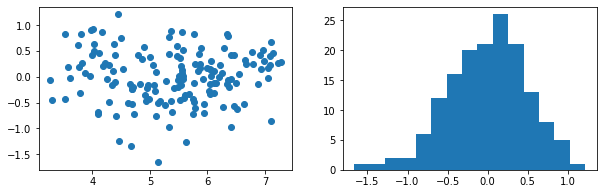

In [13]:
plt.rcParams.update({'figure.figsize':(10, 3)})

pred_val = model2.fittedvalues.copy()
true_val = sub_happy['Score'].values.copy()
residual = true_val - pred_val

plt.subplot(121)
plt.scatter(pred_val, residual)

plt.subplot(122)
plt.hist(residual, bins = 15)

- **Linearity**: The residuals in the scatterplot look fairly random and it appears that there is less of a 
curve or perhaps none at all. This assumption is met.
- **Constant Variability**: As we go along the x-axis or the y-axis, there is constant variance between the 
residuals. There is no obvious cone or fanning out shape. This assumption is met.
- **Normal distribution**: The distribution of the residuals is unimodal and normal. This assumption is met.
- **Independence of design**: This organization asked 1000 random people in each country which means their 
responses would not have influenced each others'. This assumption is met.

Since `model2` has passed all of the assumptions, we will use it to predict the happiness index. This is the 
model's equation: 

$\text{Happiness Score} = 3.2150 + 0.6943(\text{GDP}) - 1.3010(\text{Social Support}) + 1.2195(\text{sq Social})$ 
$+ 1.0576(\text{Healthy life expectancy}) + 1.5431(\text{Freedom to make life choices}) + 0.3580(\text{Generosity})$ 
$+ 0.770(\text{log Corruption})$

### Testing model
We would like to test our model on a different dataset to see whether the model performs well by comparing 
the predicted happiness index and actual hapiness index of each country or region. 
We will first load the World Happiness scores from 2018 into a variable named `happy_2018`.

In [14]:
happy_2018 = pd.read_csv('2018.csv')
happy_2018.columns

Index(['Unnamed: 0', 'Rank', 'Country', 'Score', 'GDP_Per_Capita',
       'Social_Support', 'Healthy_Life_Expectancy',
       'Freedom_To_Make_Life_Choices', 'Generosity',
       'Perceptions_Of_Corruption'],
      dtype='object')

In order to run the same model, we need to make sure that the data is in the same format as our 2019 one.

In [15]:
happy_2018['sq_Social'] = happy_2018['Social_Support'] ** 2
happy_2018['log_Corruption'] = np.log(happy_2018['Perceptions_Of_Corruption'])
len(happy_2018)

/opt/venv/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


156

Next, we need to drop any rows with possible infinite values.

In [16]:
happy_2018.replace([np.inf, -np.inf], np.nan, inplace=True) 
happy_2018.dropna(inplace=True) 
len(happy_2018)

153

Three rows were dropped from the model, which is not significant. Now, we will create a function to predict 
the happiness scores using our equation on the 2018 dataset.

In [17]:
def test_model(df):
    predicted_scores = []
    for row in range(len(df)):
        pred_score = 3.2150 + (df.iloc[row, 0]*0.6943) + (df.iloc[row, 1]*(-1.301))  + (df.iloc[row, 2]*1.2195) + (df.iloc[row, 3]*1.0576) + (df.iloc[row, 4]*1.5431) + (df.iloc[row, 5]*0.358) + (df.iloc[row, 6]*0.0770)
        predicted_scores.append(pred_score)
    return predicted_scores

This function will take a dataframe with our 7 variables as an input and iterate through each row the values of 
each column corresponding with the beta coefficients in the equation. As you can see, this is the equation 
from `model2`. It will return a list of the predicted happiness scores of the countries in order of their rank. 
We will now insert the variables we used in the dataset and insert it into the function and then add it to 
our dataset to compare.

In [18]:
old_predictors = happy_2018[['GDP_Per_Capita', 'Social_Support', 'sq_Social', 'Healthy_Life_Expectancy',  
                'Freedom_To_Make_Life_Choices', 'Generosity', 'log_Corruption']]
predict_2018 = test_model(old_predictors)
happy_2018['Predicted Score'] = predict_2018
happy_2018.head()

,Unnamed: 0,Rank,Country,Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,sq_Social,log_Corruption,Predicted Score
0,0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393,2.534464,-0.933946,7.112664
1,1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.502724,-1.078810,7.208271
2,2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.528100,-0.896488,7.172004
3,3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.702736,-1.980502,7.289788
4,4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.399401,-1.030019,7.122904


We can see that the function worked and that the predicted scores for each country were added to the 
`Predicted Score` column.

To test if our model was accurate, we will create a column showing whether our predictions were within 10% of 
the actual happiness score, whereas it will state `True` if it is within 10% and `False` if it is not.

In [19]:
accuracy = []
for row in happy_2018.index:
    minimum = (happy_2018['Score'][row]) - (happy_2018['Score'][row])*.10
    maximum = (happy_2018['Score'][row]) + (happy_2018['Score'][row])*.10
    if happy_2018['Predicted Score'][row] >= minimum and happy_2018['Predicted Score'][row] <= maximum:
        accuracy.append(True)
    else:
        accuracy.append(False)

happy_2018['Accuracy'] = accuracy

This code iterates through each row of the dataset, resetting the minimum and maximum each time as it should
change for each country, with the results of each row being appended to a list called `accuracy`. We then 
added this list to the end of our dataset for easier visual analysis.

We will now calculate the accuracy of our model by counting the number of `True` in the column.

In [20]:
count = 0
for x in happy_2018['Accuracy']:
    if x == True:
        count += 1

count/len(accuracy)

0.6993464052287581

The accuracy rate of our model is around 70%, which is good for our problem. Since we are only predicting 
the happiness scores of countries, it is not imperative to have a higher rate.